## Downsampling of mptiffs

In [2]:
### Downsampling of mptiffs from 2p-imaging experiments
## !! still need to sort out why this function stores every file in the for loop in memory...

import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils')
import alloptical_utils_pj as ao
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
# %pylab inline
# import matplotlib.image as mpimg


list = ['05', '09', '11', '14', '16']

for i in list:
    tiff_path = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-0%s/2020-03-04_t-0%s_Cycle00001_Ch3.tif' % (i, i)
    ao.downsample_tiff(tiff_path=tiff_path)
    
%reset -f

working on... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-005/2020-03-04_t-005_Cycle00001_Ch3.tif
saving as... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-005/2020-03-04_t-005_Cycle00001_Ch3_downsampled.tif
working on... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-009/2020-03-04_t-009_Cycle00001_Ch3.tif
saving as... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-009/2020-03-04_t-009_Cycle00001_Ch3_downsampled.tif
working on... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-011/2020-03-04_t-011_Cycle00001_Ch3.tif
saving as... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-011/2020-03-04_t-011_Cycle00001_Ch3_downsampled.tif
working on... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-014/2020-03-04_t-014_Cycle00001_Ch3.tif
saving as... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-014/2020-03-04_t-014_Cycle00001_Ch3_downsampled.tif
working on... /home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-016/2020-03-04_t-016_Cycle00001_Ch3.tif
saving as... /home/p

## Subselecting mptiffs

In [1]:
import tifffile as tf

# open tiff file
tiff_path = '/home/pshah/mnt/qnap/Data/2020-03-17/2020-03-17_t-014/2020-03-17_t-014_targetcells.tif'
target_frames = 1000
save_as = '/home/pshah/mnt/qnap/Data/2020-03-17/2020-03-17_t-014/2020-03-17_t-014_targetcells_subselected_1.tif'


stack = tf.imread(tiff_path)
num_frames = stack.shape[0]

stack_cropped = stack[:target_frames]

tf.imwrite(save_as, stack_cropped, photometric='minisblack')

In [2]:
print(stack_cropped.shape)

(1000, 1024, 1024)


### Troubleshooting down herara...

In [107]:
# open tiff file
tiff_path = "/home/pshah//mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012/Targets/target_image_scaled.tif"


In [39]:
# grouped average by specified interval
group_by = 4
num_frames = stack8.shape[0]//group_by
avgd_stack = np.empty((num_frames, resolution, resolution), dtype='uint8')
frame_count = np.arange(0,stack8.shape[0],group_by)

for i in np.arange(num_frames):
    frame = frame_count[i]
    avgd_stack[i] = np.mean(stack8[frame:frame+group_by], axis = 0)

# for frame in frame_count[:-1]:
#     for i in np.arange(num_frames):    
#         print(frame)
#         print(i)
#         avgd_stack[i] = np.mean(stack8[frame:frame+group_by], axis = 0)

In [40]:
tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-001/2020-03-18_J063_t-001_Cycle00001_Ch3_downsampled.tif",
           avgd_stack, photometric='minisblack')

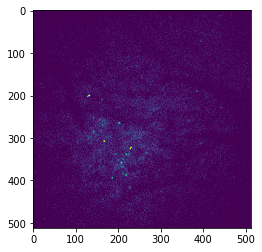

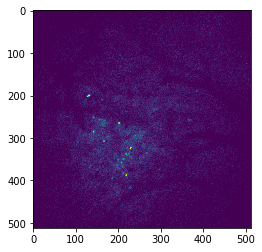

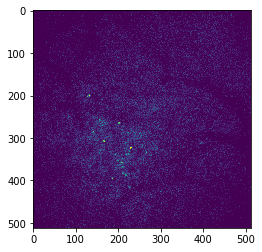

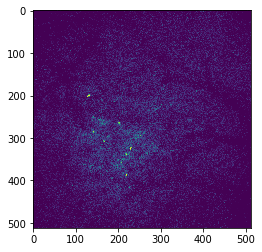

In [108]:
plt.imshow(avgd_stack[2500]); plt.show()
plt.imshow(avgd_stack[3900]); plt.show()

plt.imshow(stack[10000]); plt.show()
plt.imshow(stack[15600]); plt.show()

In [24]:
# solving the bit-convert problem

import numpy as np
import timeit

rows, cols = 1024, 1024
image = np.random.randint(100, 14000,
                             size=(1, rows, cols)).astype(np.uint16)
display_min = 1000
display_max = 10000

def display(image, display_min, display_max): # copied from Bi Rico
    # Here I set copy=True in order to ensure the original image is not
    # modified. If you don't mind modifying the original image, you can
    # set copy=False or skip this step.
    image = np.array(image, copy=True)
    image.clip(display_min, display_max, out=image)
    image -= display_min
    np.floor_divide(image, (display_max - display_min + 1) / 256,
                    out=image, casting='unsafe')
    return image.astype(np.uint8)

def lut_display(image, display_min, display_max) :
    lut = np.arange(2**16, dtype='uint16')
    lut = display(lut, display_min, display_max)
    return np.take(lut, image)

In [16]:
lut_display(image, display_min, display_max)

array([[[ 11, 211, 255, ...,   0, 255,  86],
        [ 53, 248, 208, ..., 216, 127, 107],
        [255, 222, 224, ..., 255, 255,  87],
        ...,
        [142, 144, 216, ..., 255, 255,   0],
        [ 54, 142, 236, ..., 255, 255, 255],
        [  0, 143,  63, ..., 255, 120,  84]]], dtype=uint8)

In [17]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

In [ ]:
tiff_path = "/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012/Targets/target_image_scaled.tif"

In [28]:
image8 = convert(image, 0, 255, np.uint8)